# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [12]:
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [65]:

df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [66]:
print(df["YEAR"].nunique())

7


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [67]:


mich = df.groupby("STATE")
print(mich["AVG_MATH_4_SCORE"].sum())



STATE
ALABAMA                 1600.0
ALASKA                  1651.0
ARIZONA                 1634.0
ARKANSAS                1654.0
CALIFORNIA              1387.0
COLORADO                1690.0
CONNECTICUT             1696.0
DELAWARE                1679.0
DISTRICT_OF_COLUMBIA    1531.0
FLORIDA                 1682.0
GEORGIA                 1649.0
HAWAII                  1647.0
IDAHO                   1679.0
ILLINOIS                1656.0
INDIANA                 1707.0
IOWA                    1696.0
KANSAS                  1714.0
KENTUCKY                1658.0
LOUISIANA               1611.0
MAINE                   1697.0
MARYLAND                1686.0
MASSACHUSETTS           1750.0
MICHIGAN                1657.0
MINNESOTA               1736.0
MISSISSIPPI             1600.0
MISSOURI                1669.0
MONTANA                 1694.0
NEBRASKA                1678.0
NEVADA                  1632.0
NEW_HAMPSHIRE           1743.0
NEW_JERSEY              1719.0
NEW_MEXICO              1602.0
NE

Find the average for your outcome score across all states in 2019

In [68]:
all_states = df.groupby("STATE")
print(all_states["AVG_MATH_4_SCORE"].mean())

STATE
ALABAMA                 228.571429
ALASKA                  235.857143
ARIZONA                 233.428571
ARKANSAS                236.285714
CALIFORNIA              231.166667
COLORADO                241.428571
CONNECTICUT             242.285714
DELAWARE                239.857143
DISTRICT_OF_COLUMBIA    218.714286
FLORIDA                 240.285714
GEORGIA                 235.571429
HAWAII                  235.285714
IDAHO                   239.857143
ILLINOIS                236.571429
INDIANA                 243.857143
IOWA                    242.285714
KANSAS                  244.857143
KENTUCKY                236.857143
LOUISIANA               230.142857
MAINE                   242.428571
MARYLAND                240.857143
MASSACHUSETTS           250.000000
MICHIGAN                236.714286
MINNESOTA               248.000000
MISSISSIPPI             228.571429
MISSOURI                238.428571
MONTANA                 242.000000
NEBRASKA                239.714286
NEVADA        

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [69]:
all_states = df.groupby("STATE")
print(all_states["AVG_MATH_4_SCORE"].max())

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              234.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    231.0
FLORIDA                 243.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             234.0
MISSOURI                241.0
MONTANA                 244.0
NEBRASKA                244.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_MEXICO              233.0
NEW_YORK                243.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [70]:
df["Expedenditure_per_student"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["ENROLL"]

## I added an expenditure per student column in order to have another predictor that might affter overall academic performance

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

In [71]:
## I added an expenditure per student column in order to have another predictor that might affter overall academic performance

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

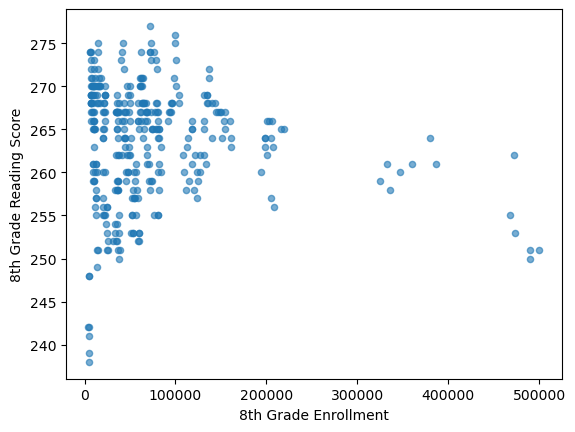

In [97]:
df.plot.scatter(x='GRADES_8_G', y='AVG_READING_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade Reading Score')
plt.show()

**<CAPTION FOR VIZ 1>**
## Average Grade 8 scores

**Visualization 2**

<AxesSubplot:xlabel='AVG_READING_4_SCORE', ylabel='AVG_READING_8_SCORE'>

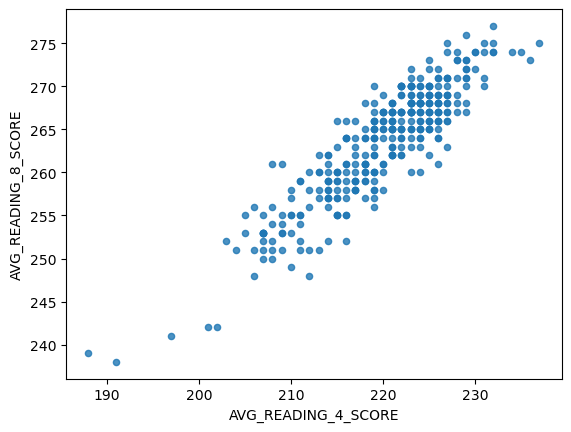

In [96]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_READING_8_SCORE', alpha=0.8)




**<CAPTION FOR VIZ 2>**

## Grade 8 reading scores vs Grade 4 reading scores

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df[["AVG_MATH_8_SCORE", "AVG_READING_4_SCORE"]].dropna()
y = df.loc[X.index]["AVG_READING_8_SCORE"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [75]:
# import your sklearn class here

from sklearn.linear_model import LinearRegression

In [76]:
# create your model here
model = LinearRegression()

In [77]:
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

print(y_pred)

[270.05401444 254.7726649  259.0117491  272.00732063 265.36477811
 268.71149898 266.11238468 266.26508236 268.26134686 266.11238468
 250.52563977 265.21208042 268.66059975 260.26834795 263.66596805
 258.46773944 265.66223255 265.56043409 268.60970053 266.11238468
 251.77429769 265.61133332 268.5588013  264.01432173 268.66059975
 267.55669859 272.30477507 267.3610426  263.66596805 261.06685375
 269.11075188 258.67133635 267.91299318 271.1579156  262.51116766
 258.170285   261.11775298 268.45700284 263.11401747 258.170285
 253.12475407 265.81493023 269.40820632 254.06801663 261.91625877
 267.3610426  252.92115716 266.1632839  268.26134686 267.65849704
 274.15628281 272.45747276 260.51490317 265.21208042 270.10491367
 260.66760085 254.87446335 266.61343603 262.01805723 258.51863867
 264.46447385 265.31387888 256.31877726 267.81119473 272.90762488
 262.61296612 265.81493023 265.50953487 261.31340896 256.87072785
 258.32298268]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [79]:
## R^2 will give us a good indiation of the performance of your model, it indicates the variance of the respone variable determined by the predictors.
## Other metrics we could use are MSE or RMSE.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

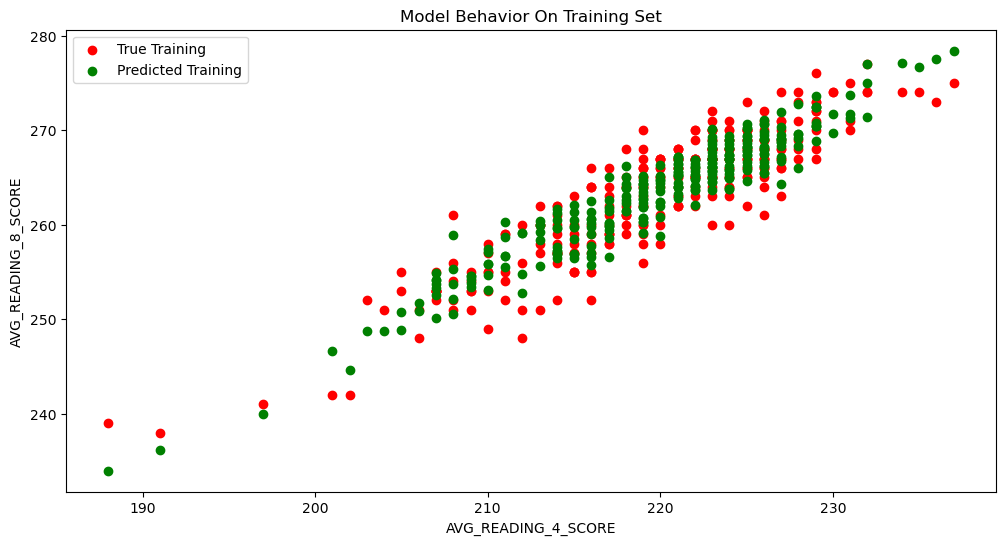

In [101]:
col_name = "AVG_READING_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior On Training Set")

plt.show()

Text(0.5, 1.0, 'Model Behavior on Testing Set')

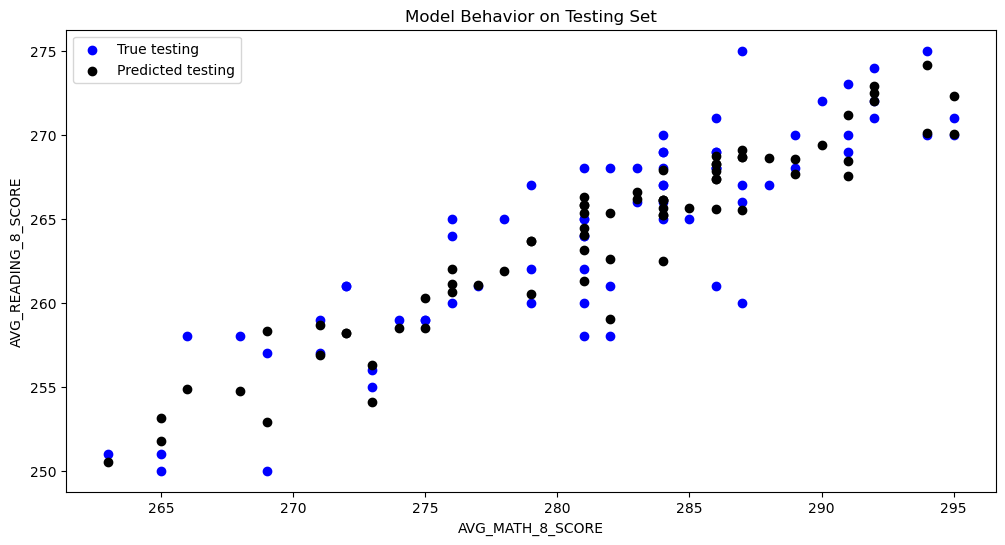

In [102]:
col_name = "AVG_MATH_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_8_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [103]:
# The first model was very accurate, there was a strong linear relation between average 8th grade reading scores
# and average 4th grade reading scores. The true training was very close to the predicted training, although
# it seems the variance increases as x increase, implying not constant variance.
# The second model was less accurate, although there was still a somewhat linear relation between average 8th grade
# reading scores and average 8th grade math scores. This model's performace is definetly not as good as the first
# there was a decent amount of deviration from the true testing and predicted testing